In [ ]:
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving 000002.jpg to 000002 (1).jpg


{'000002.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x01\x00H\x00H\x00\x00\xff\xe1\x14\xf0Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x07\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00b\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00j\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x1b\x00\x00\x00r\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\x8d\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xa4\x00\x00\x00\xd0\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01Adobe Photoshop CS Windows\x002006:01:16 13:37:34\x00\x00\x00\x00\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x01@\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x00\xf0\x00\x00\x00\x00\x00\x00\x00\x06\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01\x1e\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01&\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x01\x00\x04\x00\x00\x00\x01\x00\x00\

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage import img_as_float

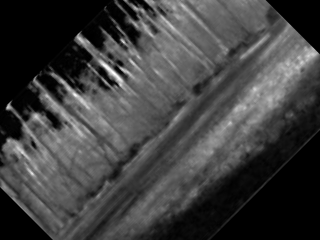

-1

In [ ]:
####rotation

import cv2  # importing cv
import imutils
from google.colab.patches import cv2_imshow
 
 
# read an image as input using OpenCV
image = cv2.imread('000002.jpg')
 
Rotated_image = imutils.rotate(image, angle=45)
 
# display the image using OpenCV of
# angle 45
cv2_imshow( Rotated_image)
 
# This is used for To Keep On Displaying
# The Image Untill Any Key is Pressed
cv2.waitKey(0)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
#image1 = cv2.imread('first_frame.png')

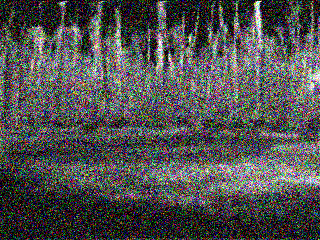

-1

In [ ]:
####awgn noise

n=np.random.normal(0,70,(240,320,3))

noise_I1=image+n

cv2_imshow( noise_I1)
 
# This is used for To Keep On Displaying
# The Image Untill Any Key is Pressed
cv2.waitKey(0)

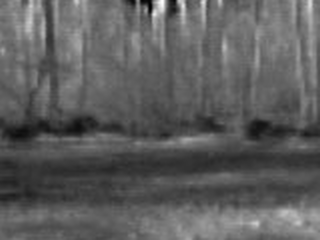

-1

In [ ]:
#### Function for zoom-in and zoom-out
from scipy.ndimage import zoom
img=image
def clipped_zoom(img, zoom_factor):
 
    h, w = img.shape[:2]
 
    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)
 
    # Zooming out
    if zoom_factor < 1:
 
        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
 
        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple)
 
    # Zooming in
    elif zoom_factor > 1:
 
        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
 
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple)
 
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]
 
    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out



zoomed_img=clipped_zoom(img,2)
cv2_imshow(zoomed_img)
 
# This is used for To Keep On Displaying
# The Image Untill Any Key is Pressed
cv2.waitKey(0)

For a rotation around the center of the image, one can 
compose a translation to change the origin, a rotation, and finally
the inverse of the first translation.



[[ 1.        -0.5        0.       ]
 [ 0.         0.8660254  0.       ]
 [ 0.         0.         1.       ]]


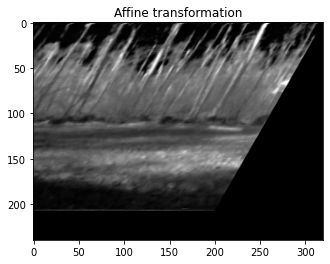

In [ ]:
####affine transformation

tform = transform.AffineTransform(
        shear=np.pi/6,
        )
print(tform.params)
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('Affine transformation')

In [ ]:
print(image.shape)

(240, 320, 3)


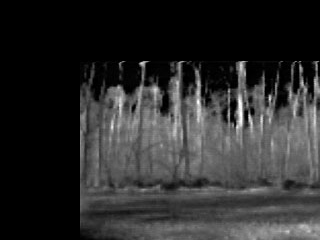

-1

In [ ]:

# Store height and width of the image
height, width,l = image.shape
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
  
cv2_imshow(img_translation)
cv2.waitKey()
  